In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
import airtable as at
#import json

In [3]:
with open('api.txt') as f:
    lines = f.readlines()


In [4]:
api_key = lines[0]
base_key = "appx3e9Przn9iprkU"
organizations_table = "Organizations"
projects_table = "Projects"

In [5]:
orgs = at.Airtable(base_key, organizations_table, api_key)
org_fields = ["Uses project (staging for Instances)", "Organization name", "Description"]
daos = orgs.get_all(view = 'DAOs in the Wild v2',sort ='Organization name', fields = org_fields)

In [6]:
for field in org_fields:
    print(daos[1]['id'])
    print(field)
    print(daos[1]['fields'][field])


recxhL8QqbWOKzwu8
Uses project (staging for Instances)
['recTLikaQcam7XT6J', 'rec2aM39btP3k6DRC', 'recijAqJh9rxY9MvH', 'rec8rCOyDwcwrT95S', 'recRJTkqk5uAagiMR', 'recHncqDiLal7GAPm', 'reca46I0TM3JSABJx', 'rec30pawOK8rt6ZjR', 'recGa1fVGsK8j2wDT', 'recYxW89TiCDVKazv', 'recon8w3CwntZZe7a', 'reca3rpaEVFR4icy7', 'recfOuKEZhI9vi3qO']
recxhL8QqbWOKzwu8
Organization name
1Hive
recxhL8QqbWOKzwu8
Description
We are exploring novel ways to create, organize, and grow communities.


In [7]:

projs = at.Airtable(base_key, projects_table, api_key)
proj_fields = ["Project name"]
tools = projs.get_all(view = 'OSS governance', sort ='Project name', fields = proj_fields)

In [8]:
daos[0]

{'id': 'recR4Tf4XWOc6RII4',
 'fields': {'Organization name': '/r/ethtrader',
  'Description': 'Community rewards and reputation that can be used for in-game governance, items, and trading.',
  'Uses project (staging for Instances)': ['recTLikaQcam7XT6J']},
 'createdTime': '2020-08-11T21:08:14.000Z'}

In [9]:
tools[0]

{'id': 'recpnVuaGssc3G05f',
 'fields': {'Project name': '1Hive Gardens'},
 'createdTime': '2020-07-01T15:48:35.000Z'}

In [10]:
daos[0]['fields']['Uses project (staging for Instances)']

['recTLikaQcam7XT6J']

In [11]:
for d in daos[:3]:
    print(d)
    print(d['fields']['Uses project (staging for Instances)'])
    print(len(d['fields']['Uses project (staging for Instances)']))
    print('')

{'id': 'recR4Tf4XWOc6RII4', 'fields': {'Organization name': '/r/ethtrader', 'Description': 'Community rewards and reputation that can be used for in-game governance, items, and trading.', 'Uses project (staging for Instances)': ['recTLikaQcam7XT6J']}, 'createdTime': '2020-08-11T21:08:14.000Z'}
['recTLikaQcam7XT6J']
1

{'id': 'recxhL8QqbWOKzwu8', 'fields': {'Organization name': '1Hive', 'Description': 'We are exploring novel ways to create, organize, and grow communities.', 'Uses project (staging for Instances)': ['recTLikaQcam7XT6J', 'rec2aM39btP3k6DRC', 'recijAqJh9rxY9MvH', 'rec8rCOyDwcwrT95S', 'recRJTkqk5uAagiMR', 'recHncqDiLal7GAPm', 'reca46I0TM3JSABJx', 'rec30pawOK8rt6ZjR', 'recGa1fVGsK8j2wDT', 'recYxW89TiCDVKazv', 'recon8w3CwntZZe7a', 'reca3rpaEVFR4icy7', 'recfOuKEZhI9vi3qO']}, 'createdTime': '2020-08-11T21:08:14.000Z'}
['recTLikaQcam7XT6J', 'rec2aM39btP3k6DRC', 'recijAqJh9rxY9MvH', 'rec8rCOyDwcwrT95S', 'recRJTkqk5uAagiMR', 'recHncqDiLal7GAPm', 'reca46I0TM3JSABJx', 'rec30pawOK8rt6

In [12]:
#trim the data set and get a list of DAOs based on which ones have tool use data
my_daos = []
my_tool_ids = []
for d in daos:
     if 'Uses project (staging for Instances)' in d['fields'].keys():
         my_dao_id = d['id']
         my_dao_name = d['fields']['Organization name']
         my_dao_tools = d['fields']['Uses project (staging for Instances)']

         my_dao_record = {'id':my_dao_id, 'name':my_dao_name, 'tools':my_dao_tools }

         my_daos.append(my_dao_record)

         for t in my_dao_tools:
             if t not in my_tool_ids:
                 my_tool_ids.append(t)


In [13]:
my_tools = []

for t in tools:
    if t['id'] in my_tool_ids:
        my_tool_id = t['id']
        my_tool_name = t['fields']['Project name']

        my_tool_record = {'id':my_tool_id, 'name':my_tool_name}

        my_tools.append(my_tool_record)

In [14]:
my_tools

[{'id': 'recTLikaQcam7XT6J', 'name': 'Aragon'},
 {'id': 'recijAqJh9rxY9MvH', 'name': 'cadCAD'},
 {'id': 'recPAwMZyZGH97Xda', 'name': 'Commons Stack Praise Bot'},
 {'id': 'rec2aM39btP3k6DRC', 'name': 'Conviction Voting'},
 {'id': 'rectOPIzuwyF7zqtE', 'name': 'DAOstack'},
 {'id': 'recbtri1wfR12kiGe', 'name': 'Decred'},
 {'id': 'reca3rpaEVFR4icy7', 'name': 'discord.py'},
 {'id': 'recon8w3CwntZZe7a', 'name': 'Discourse'},
 {'id': 'recMBR7fypzSMO2eB', 'name': 'Ethereum'},
 {'id': 'recTXsbHhNPbbWGKY', 'name': 'GitBook'},
 {'id': 'reca46I0TM3JSABJx', 'name': 'Keybase'},
 {'id': 'recNKpSgWTry1rc2m', 'name': 'Snapshot'},
 {'id': 'recGa1fVGsK8j2wDT', 'name': 'SourceCred'},
 {'id': 'recNcDf0XmUREEEvp', 'name': 'Tezos'}]

In [15]:
#DAOs as a dataframe
ddf = pd.DataFrame(my_daos)
tdf = pd.DataFrame(my_tools)

In [16]:
tdf

,id,name
0,recTLikaQcam7XT6J,Aragon
1,recijAqJh9rxY9MvH,cadCAD
2,recPAwMZyZGH97Xda,Commons Stack Praise Bot
3,rec2aM39btP3k6DRC,Conviction Voting
4,rectOPIzuwyF7zqtE,DAOstack
5,recbtri1wfR12kiGe,Decred
6,reca3rpaEVFR4icy7,discord.py
7,recon8w3CwntZZe7a,Discourse
8,recMBR7fypzSMO2eB,Ethereum
9,recTXsbHhNPbbWGKY,GitBook


In [17]:
ddf

,id,name,tools
0,recR4Tf4XWOc6RII4,/r/ethtrader,[recTLikaQcam7XT6J]
1,recxhL8QqbWOKzwu8,1Hive,"[recTLikaQcam7XT6J, rec2aM39btP3k6DRC, recijAq..."
2,reccEp6IXzucOpy3A,1UP World,"[rectOPIzuwyF7zqtE, rectjqMULWohD6jFn, recYxW8..."
3,rec3nlkptrNQYdnOv,Aave,"[rectjqMULWohD6jFn, recRJTkqk5uAagiMR, recon8w..."
4,rec3aYbrcxpFZghOE,Aragon Network DAO,"[recTLikaQcam7XT6J, recon8w3CwntZZe7a, recHncq..."
...,...,...,...
65,recgCHRGveOl6posb,UniDAO,[recTLikaQcam7XT6J]
66,recLTOPlSkn46hJyH,VirtueDAO,[recMBR7fypzSMO2eB]
67,reclmECmXICGm1XFZ,VitaDAO,"[recon8w3CwntZZe7a, recSP2BoOlnNutTd0, recMnj2..."
68,reccgQzOoArTxmOMg,YangDAO,"[recMnj2FW8gKjcHu7, recRJTkqk5uAagiMR, recYxW8..."


In [18]:
def is_there_vec(tool_id, source=ddf):
    
    source['is_there'] = source.tools.apply(lambda x: tool_id in x)

    return source.is_there.values


In [19]:
is_there_vec('recMBR7fypzSMO2eB')

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False,  True, False, False, False])

In [20]:
df = ddf.copy()

indices = tdf.index

for i in indices:
    col_name = tdf.name.values[i]
    tool_id = tdf.id.values[i]
    df[col_name] = is_there_vec(tool_id)

In [21]:
df

,id,name,tools,is_there,Aragon,cadCAD,Commons Stack Praise Bot,Conviction Voting,DAOstack,Decred,discord.py,Discourse,Ethereum,GitBook,Keybase,Snapshot,SourceCred,Tezos
0,recR4Tf4XWOc6RII4,/r/ethtrader,[recTLikaQcam7XT6J],False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,recxhL8QqbWOKzwu8,1Hive,"[recTLikaQcam7XT6J, rec2aM39btP3k6DRC, recijAq...",False,True,True,False,True,False,False,True,True,False,False,True,False,True,False
2,reccEp6IXzucOpy3A,1UP World,"[rectOPIzuwyF7zqtE, rectjqMULWohD6jFn, recYxW8...",False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,rec3nlkptrNQYdnOv,Aave,"[rectjqMULWohD6jFn, recRJTkqk5uAagiMR, recon8w...",False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,rec3aYbrcxpFZghOE,Aragon Network DAO,"[recTLikaQcam7XT6J, recon8w3CwntZZe7a, recHncq...",False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,recgCHRGveOl6posb,UniDAO,[recTLikaQcam7XT6J],False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
66,recLTOPlSkn46hJyH,VirtueDAO,[recMBR7fypzSMO2eB],True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
67,reclmECmXICGm1XFZ,VitaDAO,"[recon8w3CwntZZe7a, recSP2BoOlnNutTd0, recMnj2...",False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
68,reccgQzOoArTxmOMg,YangDAO,"[recMnj2FW8gKjcHu7, recRJTkqk5uAagiMR, recYxW8...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
import seaborn as sns

In [23]:
#initialize a networkx object
G = nx.DiGraph()

#method to add a tool
def add_tool(g, r):
    '''
    g is networkx DiGraph()
    r is a record from the my_tools
    '''
    nid = r['id']
    g.add_node(nid)
    
    g.nodes[nid]['type']='tool'
    g.nodes[nid]['name'] = r['name']

#method to add an org (and tools it uses)
def add_org(g, r, tool_airtable = projs):
    '''
    g is networkx DiGraph()
    r is a record from my_daos
    '''
    nid = r['id']
    g.add_node(nid)
    
    g.nodes[nid]['type']='org'
    g.nodes[nid]['name'] = r['name']

    tids = r['tools']

    for tid in tids:
        if tid in g.nodes:
            g.add_edge(nid, tid)
            g.edges[nid,tid]['type'] = 'user'
        else:
            g.add_node(tid)
            g.nodes[tid]['type']='tool'

            t_data = tool_airtable.get(tid)

            g.nodes[tid]['name'] = t_data['fields']['Project name']

for d in my_daos:
    add_org(G, d)


In [24]:
G.nodes

NodeView(('recR4Tf4XWOc6RII4', 'recTLikaQcam7XT6J', 'recxhL8QqbWOKzwu8', 'rec2aM39btP3k6DRC', 'recijAqJh9rxY9MvH', 'rec8rCOyDwcwrT95S', 'recRJTkqk5uAagiMR', 'recHncqDiLal7GAPm', 'reca46I0TM3JSABJx', 'rec30pawOK8rt6ZjR', 'recGa1fVGsK8j2wDT', 'recYxW89TiCDVKazv', 'recon8w3CwntZZe7a', 'reca3rpaEVFR4icy7', 'recfOuKEZhI9vi3qO', 'reccEp6IXzucOpy3A', 'rectOPIzuwyF7zqtE', 'rectjqMULWohD6jFn', 'rec3nlkptrNQYdnOv', 'rec3aYbrcxpFZghOE', 'recfGkC3m5G3t6bYt', 'recog8Suk0zBmgkHV', 'rec1gZ3HltfC61ckE', 'recNKpSgWTry1rc2m', 'recelwRgEIoTJ8ICJ', 'recMBR7fypzSMO2eB', 'reczJJtnXpwr3Lo8f', 'recvyv6LJm8B3fJ8h', 'recvfzeECzfp1wWjW', 'recktpsAyCeblvhvO', 'recxnIifnMBdfTcbO', 'recAuyusQJgP1Fb8Q', 'rec2QM9gqB7Y0dsIa', 'recMdeRlMuMofHyZs', 'recsUe4H35TpgI6lJ', 'recHguxXzLnxXte9V', 'recxV84caJxiUcGVw', 'recPAwMZyZGH97Xda', 'reclhfZ9PXCwnDDCh', 'rec7KGhrJhG0i1VRC', 'recJIKGpx1txYQlE5', 'recCmfuvd4z7uPhQq', 'rechmaQ1XiduCix2M', 'recjBU8WYR8wQXudt', 'recMnj2FW8gKjcHu7', 'recKtilkMPfOvLXm5', 'recHnPjgOFRYgzMy1', 're

In [25]:
def get_nodes_by_type(g, node_type_selection):
    '''
    Definition:
    Function to extract nodes based by named type
    Parameters:
    g: network x object
    node_type_selection: node type
    Assumptions:
    Returns:
    List column of the desired information as:
    Example:
    proposals = get_nodes_by_type(network, 'proposal')
    '''
    return [node for node in g.nodes if g.nodes[node]['type']== node_type_selection ]

In [26]:
dao_nodes = get_nodes_by_type(G, 'org')
n = len(dao_nodes)

tool_nodes = get_nodes_by_type(G, 'tool')
m = len(tool_nodes)

In [27]:
pos = {}
labels = {}

for i in range(n):
    d = dao_nodes[i]
    pos[d] = [0, i]

    try:
        labels[d] = G.nodes[d]['name']
    except:
        labels[d] = d

for j in range(m):
    t = tool_nodes[j]
    pos[t] = [1, j+(n-m)/2]

    try:
        labels[t] = G.nodes[t]['name']
    except:
        labels[t] = t

Text(0.5, 1.0, 'Graph View of Tools Used by DAOs in the Wild')

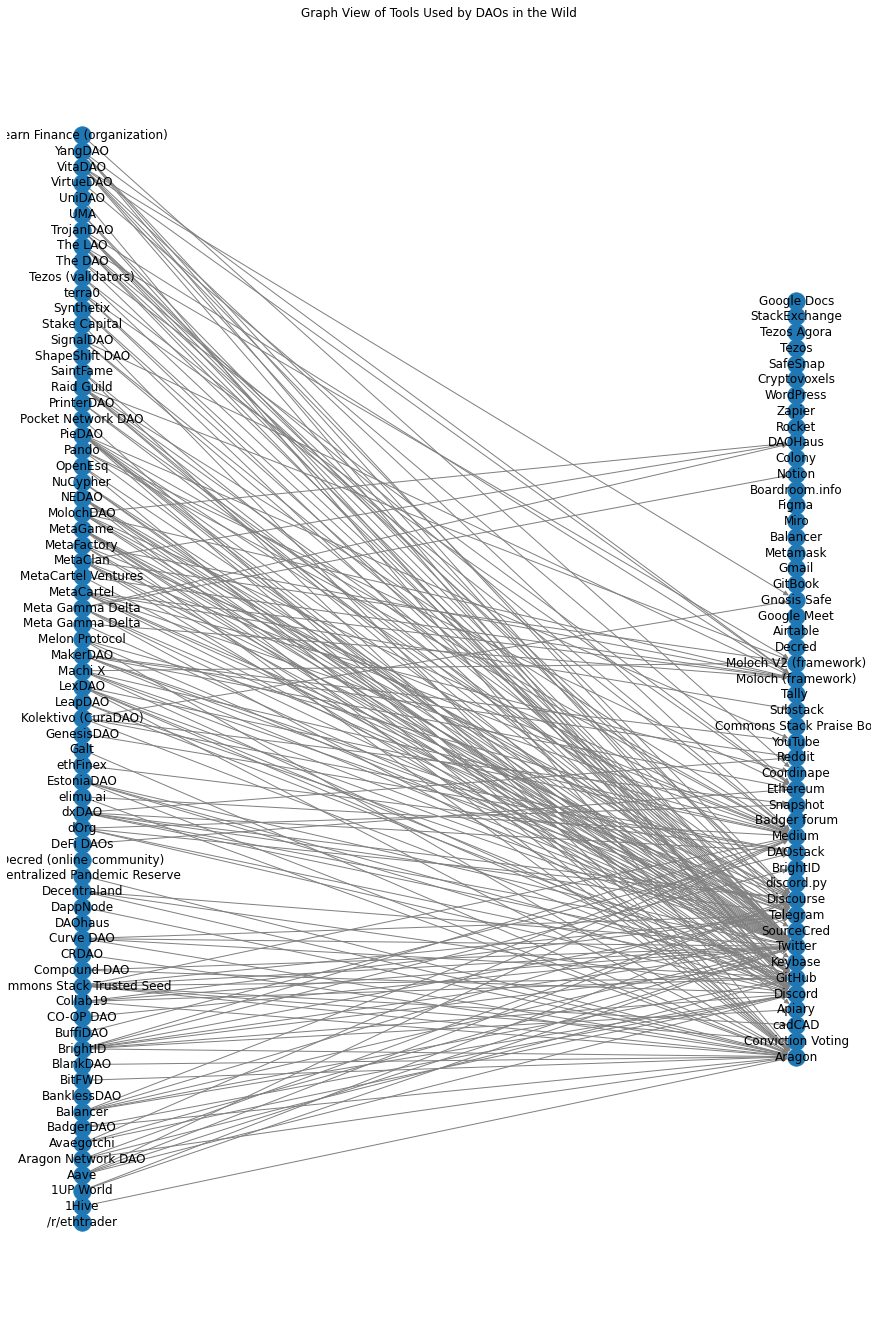

In [28]:
plt.figure(figsize=(12, 18))
nx.draw(G, pos, labels=labels, edge_color = 'gray')
plt.title('Graph View of Tools Used by DAOs in the Wild')

## Next steps
- exploratory data analysis on this data steps

In [29]:
def includes(list, tool):
    return bool(tool in list)

In [30]:
aragon_tool_id = 'recTLikaQcam7XT6J'
ddf['aragon'] = ddf.tools.apply(lambda x: includes(x, aragon_tool_id))

In [31]:
orgs_using_aragon = ddf[ddf.aragon].id.values

In [32]:
len(orgs_using_aragon)

27

In [33]:
orgs_using_aragon

array(['recR4Tf4XWOc6RII4', 'recxhL8QqbWOKzwu8', 'rec3aYbrcxpFZghOE',
       'recog8Suk0zBmgkHV', 'recvfzeECzfp1wWjW', 'recktpsAyCeblvhvO',
       'recxnIifnMBdfTcbO', 'recMdeRlMuMofHyZs', 'recsUe4H35TpgI6lJ',
       'recCmfuvd4z7uPhQq', 'rechmaQ1XiduCix2M', 'recHnPjgOFRYgzMy1',
       'recdm4N8p5ontJUdD', 'recmQKn9p45tyNyYp', 'rec5nctrbjyNJGH52',
       'recR6vMN6wavJvB85', 'rec46C3X6IhVj3qKO', 'recCGts9ttyauXJhf',
       'recPDTUXZDzN9Q6Ge', 'recvsX3Wm0x2K0rwB', 'recCglCjzevPpJqgV',
       'recWeeCqAY2QbrFNL', 'receypZYHzcgQeE8q', 'rec56K0nZA8Ys0DxM',
       'recRxhGQ7BrSshY9t', 'recBawDYfYBSJxWu1', 'recgCHRGveOl6posb'],
      dtype=object)

In [34]:
ddf[ddf.id.apply(lambda x: x in orgs_using_aragon)]

,id,name,tools,is_there,aragon
0,recR4Tf4XWOc6RII4,/r/ethtrader,[recTLikaQcam7XT6J],False,True
1,recxhL8QqbWOKzwu8,1Hive,"[recTLikaQcam7XT6J, rec2aM39btP3k6DRC, recijAq...",False,True
4,rec3aYbrcxpFZghOE,Aragon Network DAO,"[recTLikaQcam7XT6J, recon8w3CwntZZe7a, recHncq...",False,True
6,recog8Suk0zBmgkHV,BadgerDAO,"[rec1gZ3HltfC61ckE, recTLikaQcam7XT6J, recNKpS...",False,True
9,recvfzeECzfp1wWjW,BitFWD,[recTLikaQcam7XT6J],False,True
10,recktpsAyCeblvhvO,BlankDAO,[recTLikaQcam7XT6J],False,True
11,recxnIifnMBdfTcbO,BrightID,"[recTLikaQcam7XT6J, rec8rCOyDwcwrT95S, rectjqM...",False,True
14,recMdeRlMuMofHyZs,Collab19,"[recTLikaQcam7XT6J, recHncqDiLal7GAPm, recYxW8...",False,True
15,recsUe4H35TpgI6lJ,Commons Stack Trusted Seed,"[recTLikaQcam7XT6J, rectjqMULWohD6jFn, recHncq...",False,True
17,recCmfuvd4z7uPhQq,CRDAO,[recTLikaQcam7XT6J],False,True


In [35]:
co_use = []
for l in ddf[ddf.aragon].tools.values:
    co_use = l + co_use

co_use = list(set(co_use))

In [36]:
len(co_use)

19

In [37]:
asg_nodes = list(orgs_using_aragon)+co_use
asg = G.subgraph(asg_nodes)

In [38]:
asg_labels = {}
for k in labels.keys():
    if k in asg_nodes:
        asg_labels[k] = labels[k]

The purpose this plot is

the things i included are

here is what i saw--

Text(0.5, 1.0, 'Graph View of Tools Used by DAOs in the Wild')

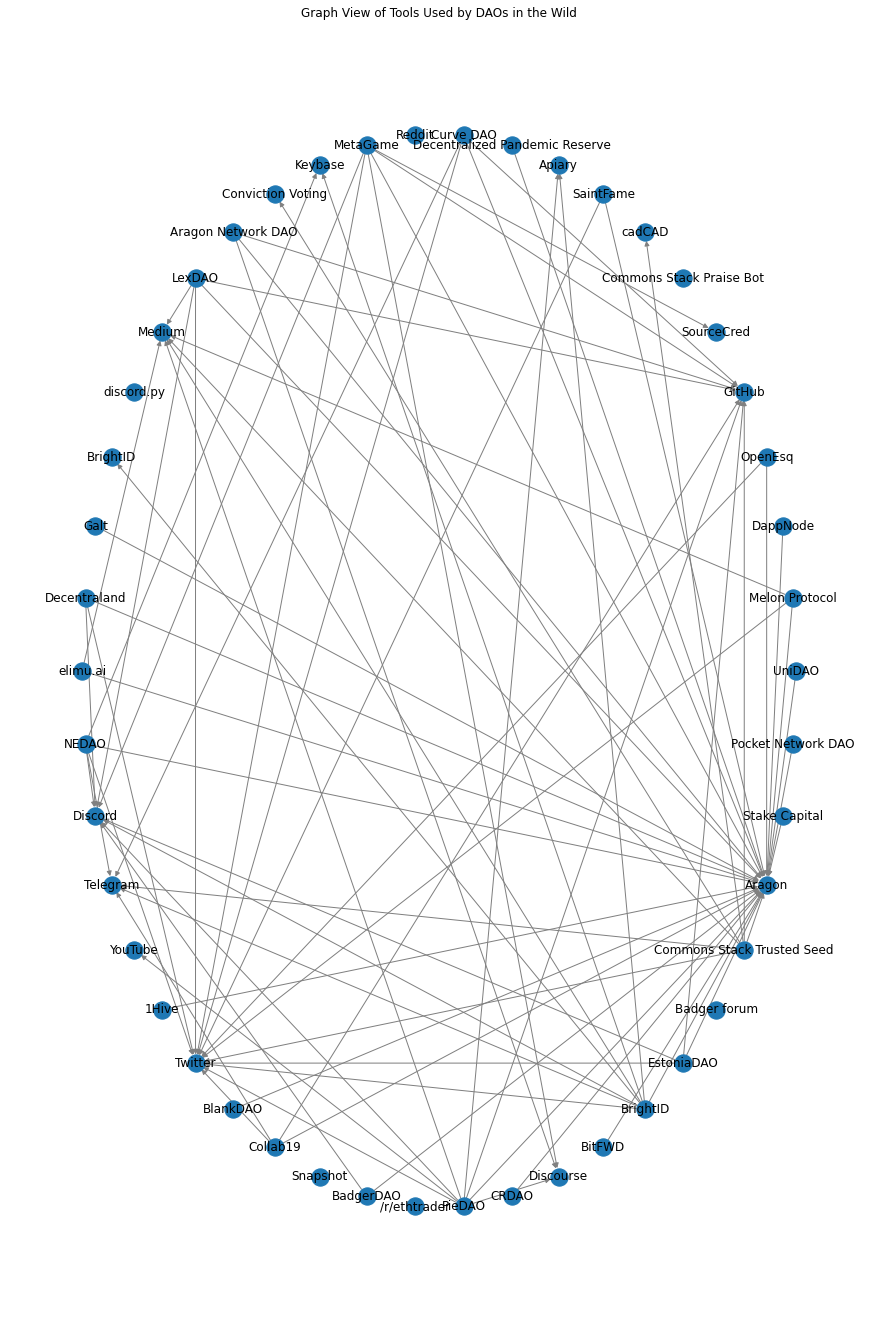

In [39]:
plt.figure(figsize=(12, 18))
nx.draw_circular(asg, labels=asg_labels, edge_color = 'gray')
plt.title('Graph View of Tools Used by DAOs in the Wild')

In [40]:
list(ddf[ddf.id == 'recxhL8QqbWOKzwu8'].tools.values)[0]

['recTLikaQcam7XT6J',
 'rec2aM39btP3k6DRC',
 'recijAqJh9rxY9MvH',
 'rec8rCOyDwcwrT95S',
 'recRJTkqk5uAagiMR',
 'recHncqDiLal7GAPm',
 'reca46I0TM3JSABJx',
 'rec30pawOK8rt6ZjR',
 'recGa1fVGsK8j2wDT',
 'recYxW89TiCDVKazv',
 'recon8w3CwntZZe7a',
 'reca3rpaEVFR4icy7',
 'recfOuKEZhI9vi3qO']

In [41]:
ddf[ddf.id == 'recxhL8QqbWOKzwu8'].tools.values

array([list(['recTLikaQcam7XT6J', 'rec2aM39btP3k6DRC', 'recijAqJh9rxY9MvH', 'rec8rCOyDwcwrT95S', 'recRJTkqk5uAagiMR', 'recHncqDiLal7GAPm', 'reca46I0TM3JSABJx', 'rec30pawOK8rt6ZjR', 'recGa1fVGsK8j2wDT', 'recYxW89TiCDVKazv', 'recon8w3CwntZZe7a', 'reca3rpaEVFR4icy7', 'recfOuKEZhI9vi3qO'])],
      dtype=object)

In [42]:
co_use

['recHncqDiLal7GAPm',
 'recGa1fVGsK8j2wDT',
 'recPAwMZyZGH97Xda',
 'recijAqJh9rxY9MvH',
 'rec8rCOyDwcwrT95S',
 'recHguxXzLnxXte9V',
 'reca46I0TM3JSABJx',
 'rec2aM39btP3k6DRC',
 'rectjqMULWohD6jFn',
 'reca3rpaEVFR4icy7',
 'recfOuKEZhI9vi3qO',
 'recRJTkqk5uAagiMR',
 'recYxW89TiCDVKazv',
 'recxV84caJxiUcGVw',
 'rec30pawOK8rt6ZjR',
 'recNKpSgWTry1rc2m',
 'recon8w3CwntZZe7a',
 'rec1gZ3HltfC61ckE',
 'recTLikaQcam7XT6J']

In [43]:
ano = len(orgs_using_aragon)
ant = len(co_use)

data = np.empty((ano,ant))
for i in range(ano):
    org = orgs_using_aragon[i]
    use = list(ddf[ddf.id == org].tools.values)[0]
    print(org)
    print(use)
    for j in range(ant):
        tool = co_use[j]
        data[i,j] = bool(tool in use)



recR4Tf4XWOc6RII4
['recTLikaQcam7XT6J']
recxhL8QqbWOKzwu8
['recTLikaQcam7XT6J', 'rec2aM39btP3k6DRC', 'recijAqJh9rxY9MvH', 'rec8rCOyDwcwrT95S', 'recRJTkqk5uAagiMR', 'recHncqDiLal7GAPm', 'reca46I0TM3JSABJx', 'rec30pawOK8rt6ZjR', 'recGa1fVGsK8j2wDT', 'recYxW89TiCDVKazv', 'recon8w3CwntZZe7a', 'reca3rpaEVFR4icy7', 'recfOuKEZhI9vi3qO']
rec3aYbrcxpFZghOE
['recTLikaQcam7XT6J', 'recon8w3CwntZZe7a', 'recHncqDiLal7GAPm']
recog8Suk0zBmgkHV
['rec1gZ3HltfC61ckE', 'recTLikaQcam7XT6J', 'recNKpSgWTry1rc2m', 'recRJTkqk5uAagiMR']
recvfzeECzfp1wWjW
['recTLikaQcam7XT6J']
recktpsAyCeblvhvO
['recTLikaQcam7XT6J']
recxnIifnMBdfTcbO
['recTLikaQcam7XT6J', 'rec8rCOyDwcwrT95S', 'rectjqMULWohD6jFn', 'recRJTkqk5uAagiMR', 'reca46I0TM3JSABJx', 'recYxW89TiCDVKazv', 'rec30pawOK8rt6ZjR', 'recfOuKEZhI9vi3qO']
recMdeRlMuMofHyZs
['recTLikaQcam7XT6J', 'recHncqDiLal7GAPm', 'recYxW89TiCDVKazv', 'rec30pawOK8rt6ZjR']
recsUe4H35TpgI6lJ
['recTLikaQcam7XT6J', 'rectjqMULWohD6jFn', 'recHncqDiLal7GAPm', 'recHguxXzLnxXte9V', 'recYxW89T

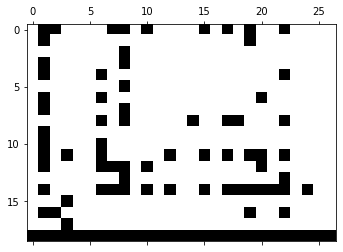

In [44]:
plt.spy(data.T)

In [45]:
def getnames(node_ids):
    print(node_ids)
    return [G.nodes[node_id]['name'] for node_id in node_ids]

['recHncqDiLal7GAPm', 'recGa1fVGsK8j2wDT', 'recPAwMZyZGH97Xda', 'recijAqJh9rxY9MvH', 'rec8rCOyDwcwrT95S', 'recHguxXzLnxXte9V', 'reca46I0TM3JSABJx', 'rec2aM39btP3k6DRC', 'rectjqMULWohD6jFn', 'reca3rpaEVFR4icy7', 'recfOuKEZhI9vi3qO', 'recRJTkqk5uAagiMR', 'recYxW89TiCDVKazv', 'recxV84caJxiUcGVw', 'rec30pawOK8rt6ZjR', 'recNKpSgWTry1rc2m', 'recon8w3CwntZZe7a', 'rec1gZ3HltfC61ckE', 'recTLikaQcam7XT6J']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

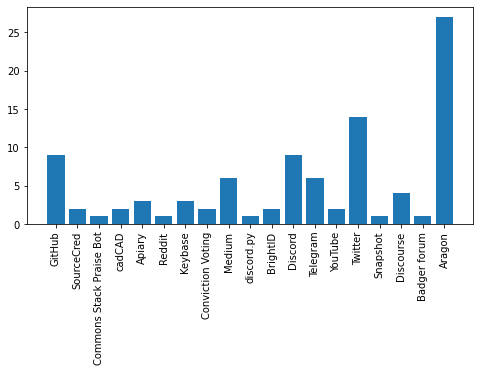

In [46]:
plt.figure(figsize=(8, 4))
plt.bar(getnames(co_use),np.sum(data, axis = 0))
plt.xticks(rotation='vertical')

In [47]:
G.nodes[aragon_tool_id]['name']

'Aragon'

['recR4Tf4XWOc6RII4' 'recxhL8QqbWOKzwu8' 'rec3aYbrcxpFZghOE'
 'recog8Suk0zBmgkHV' 'recvfzeECzfp1wWjW' 'recktpsAyCeblvhvO'
 'recxnIifnMBdfTcbO' 'recMdeRlMuMofHyZs' 'recsUe4H35TpgI6lJ'
 'recCmfuvd4z7uPhQq' 'rechmaQ1XiduCix2M' 'recHnPjgOFRYgzMy1'
 'recdm4N8p5ontJUdD' 'recmQKn9p45tyNyYp' 'rec5nctrbjyNJGH52'
 'recR6vMN6wavJvB85' 'rec46C3X6IhVj3qKO' 'recCGts9ttyauXJhf'
 'recPDTUXZDzN9Q6Ge' 'recvsX3Wm0x2K0rwB' 'recCglCjzevPpJqgV'
 'recWeeCqAY2QbrFNL' 'receypZYHzcgQeE8q' 'rec56K0nZA8Ys0DxM'
 'recRxhGQ7BrSshY9t' 'recBawDYfYBSJxWu1' 'recgCHRGveOl6posb']


<BarContainer object of 27 artists>

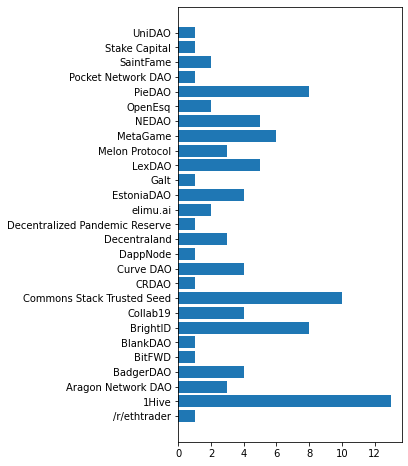

In [48]:
plt.figure(figsize=(4, 8))
plt.barh(getnames(orgs_using_aragon),np.sum(data, axis = 1))

In [49]:
data_df = pd.DataFrame(data, index = getnames(orgs_using_aragon), columns=getnames(co_use) )

['recR4Tf4XWOc6RII4' 'recxhL8QqbWOKzwu8' 'rec3aYbrcxpFZghOE'
 'recog8Suk0zBmgkHV' 'recvfzeECzfp1wWjW' 'recktpsAyCeblvhvO'
 'recxnIifnMBdfTcbO' 'recMdeRlMuMofHyZs' 'recsUe4H35TpgI6lJ'
 'recCmfuvd4z7uPhQq' 'rechmaQ1XiduCix2M' 'recHnPjgOFRYgzMy1'
 'recdm4N8p5ontJUdD' 'recmQKn9p45tyNyYp' 'rec5nctrbjyNJGH52'
 'recR6vMN6wavJvB85' 'rec46C3X6IhVj3qKO' 'recCGts9ttyauXJhf'
 'recPDTUXZDzN9Q6Ge' 'recvsX3Wm0x2K0rwB' 'recCglCjzevPpJqgV'
 'recWeeCqAY2QbrFNL' 'receypZYHzcgQeE8q' 'rec56K0nZA8Ys0DxM'
 'recRxhGQ7BrSshY9t' 'recBawDYfYBSJxWu1' 'recgCHRGveOl6posb']
['recHncqDiLal7GAPm', 'recGa1fVGsK8j2wDT', 'recPAwMZyZGH97Xda', 'recijAqJh9rxY9MvH', 'rec8rCOyDwcwrT95S', 'recHguxXzLnxXte9V', 'reca46I0TM3JSABJx', 'rec2aM39btP3k6DRC', 'rectjqMULWohD6jFn', 'reca3rpaEVFR4icy7', 'recfOuKEZhI9vi3qO', 'recRJTkqk5uAagiMR', 'recYxW89TiCDVKazv', 'recxV84caJxiUcGVw', 'rec30pawOK8rt6ZjR', 'recNKpSgWTry1rc2m', 'recon8w3CwntZZe7a', 'rec1gZ3HltfC61ckE', 'recTLikaQcam7XT6J']


In [50]:
import seaborn as sns

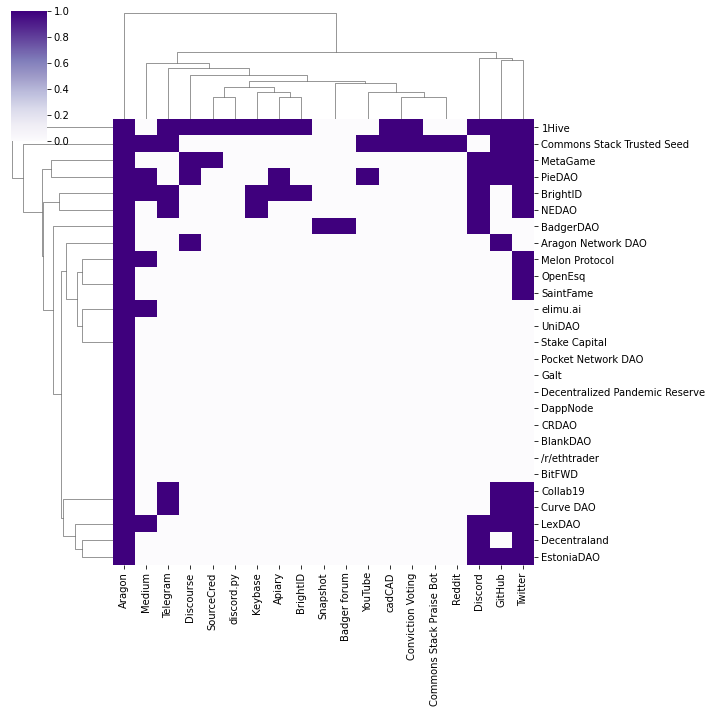

In [51]:
sns.clustermap(data=data_df, cmap = 'Purples')

['recR4Tf4XWOc6RII4' 'recxhL8QqbWOKzwu8' 'rec3aYbrcxpFZghOE'
 'recog8Suk0zBmgkHV' 'recvfzeECzfp1wWjW' 'recktpsAyCeblvhvO'
 'recxnIifnMBdfTcbO' 'recMdeRlMuMofHyZs' 'recsUe4H35TpgI6lJ'
 'recCmfuvd4z7uPhQq' 'rechmaQ1XiduCix2M' 'recHnPjgOFRYgzMy1'
 'recdm4N8p5ontJUdD' 'recmQKn9p45tyNyYp' 'rec5nctrbjyNJGH52'
 'recR6vMN6wavJvB85' 'rec46C3X6IhVj3qKO' 'recCGts9ttyauXJhf'
 'recPDTUXZDzN9Q6Ge' 'recvsX3Wm0x2K0rwB' 'recCglCjzevPpJqgV'
 'recWeeCqAY2QbrFNL' 'receypZYHzcgQeE8q' 'rec56K0nZA8Ys0DxM'
 'recRxhGQ7BrSshY9t' 'recBawDYfYBSJxWu1' 'recgCHRGveOl6posb']
['recR4Tf4XWOc6RII4' 'recxhL8QqbWOKzwu8' 'rec3aYbrcxpFZghOE'
 'recog8Suk0zBmgkHV' 'recvfzeECzfp1wWjW' 'recktpsAyCeblvhvO'
 'recxnIifnMBdfTcbO' 'recMdeRlMuMofHyZs' 'recsUe4H35TpgI6lJ'
 'recCmfuvd4z7uPhQq' 'rechmaQ1XiduCix2M' 'recHnPjgOFRYgzMy1'
 'recdm4N8p5ontJUdD' 'recmQKn9p45tyNyYp' 'rec5nctrbjyNJGH52'
 'recR6vMN6wavJvB85' 'rec46C3X6IhVj3qKO' 'recCGts9ttyauXJhf'
 'recPDTUXZDzN9Q6Ge' 'recvsX3Wm0x2K0rwB' 'recCglCjzevPpJqgV'
 'recWeeCqAY2QbrFNL' 'r

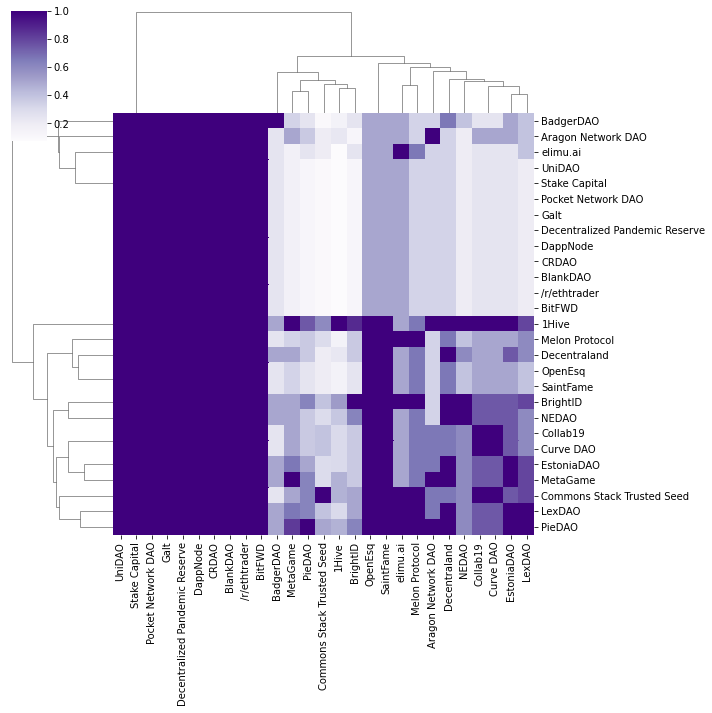

In [52]:
org_data = np.matmul(data,data.T)/np.sum(data, axis=1)


org_data_df = pd.DataFrame(org_data, index = getnames(orgs_using_aragon), columns=getnames(orgs_using_aragon) )
sns.clustermap(data=org_data_df, cmap = 'Purples')

['recR4Tf4XWOc6RII4' 'recxhL8QqbWOKzwu8' 'rec3aYbrcxpFZghOE'
 'recog8Suk0zBmgkHV' 'recvfzeECzfp1wWjW' 'recktpsAyCeblvhvO'
 'recxnIifnMBdfTcbO' 'recMdeRlMuMofHyZs' 'recsUe4H35TpgI6lJ'
 'recCmfuvd4z7uPhQq' 'rechmaQ1XiduCix2M' 'recHnPjgOFRYgzMy1'
 'recdm4N8p5ontJUdD' 'recmQKn9p45tyNyYp' 'rec5nctrbjyNJGH52'
 'recR6vMN6wavJvB85' 'rec46C3X6IhVj3qKO' 'recCGts9ttyauXJhf'
 'recPDTUXZDzN9Q6Ge' 'recvsX3Wm0x2K0rwB' 'recCglCjzevPpJqgV'
 'recWeeCqAY2QbrFNL' 'receypZYHzcgQeE8q' 'rec56K0nZA8Ys0DxM'
 'recRxhGQ7BrSshY9t' 'recBawDYfYBSJxWu1' 'recgCHRGveOl6posb']
['recR4Tf4XWOc6RII4' 'recxhL8QqbWOKzwu8' 'rec3aYbrcxpFZghOE'
 'recog8Suk0zBmgkHV' 'recvfzeECzfp1wWjW' 'recktpsAyCeblvhvO'
 'recxnIifnMBdfTcbO' 'recMdeRlMuMofHyZs' 'recsUe4H35TpgI6lJ'
 'recCmfuvd4z7uPhQq' 'rechmaQ1XiduCix2M' 'recHnPjgOFRYgzMy1'
 'recdm4N8p5ontJUdD' 'recmQKn9p45tyNyYp' 'rec5nctrbjyNJGH52'
 'recR6vMN6wavJvB85' 'rec46C3X6IhVj3qKO' 'recCGts9ttyauXJhf'
 'recPDTUXZDzN9Q6Ge' 'recvsX3Wm0x2K0rwB' 'recCglCjzevPpJqgV'
 'recWeeCqAY2QbrFNL' 'r

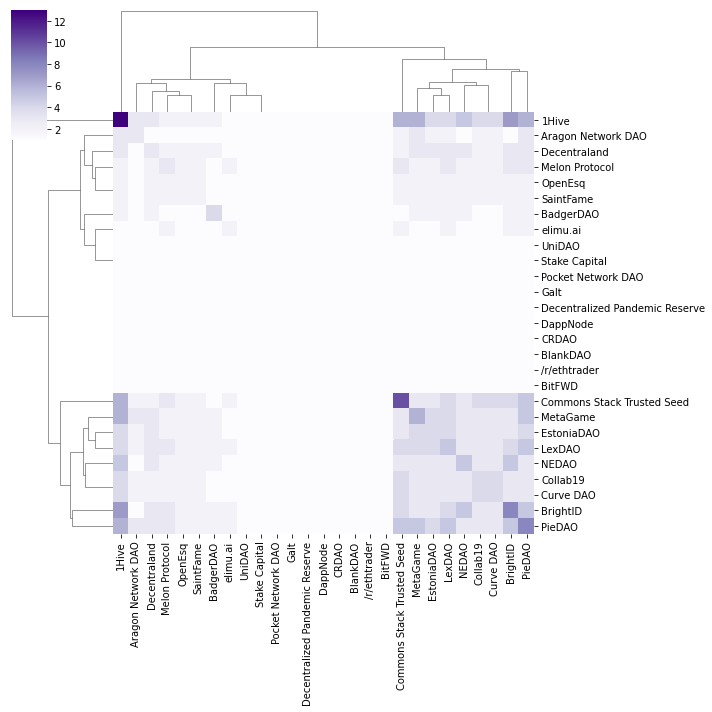

In [53]:
# %%
#normalized
#org_data = np.matmul(data,data.T)/np.sum(data, axis=1)

#unnormalized
org_data = np.matmul(data,data.T)

org_data_df = pd.DataFrame(org_data, index = getnames(orgs_using_aragon), columns=getnames(orgs_using_aragon) )
sns.clustermap(data=org_data_df, cmap = 'Purples')

['recHncqDiLal7GAPm', 'recGa1fVGsK8j2wDT', 'recPAwMZyZGH97Xda', 'recijAqJh9rxY9MvH', 'rec8rCOyDwcwrT95S', 'recHguxXzLnxXte9V', 'reca46I0TM3JSABJx', 'rec2aM39btP3k6DRC', 'rectjqMULWohD6jFn', 'reca3rpaEVFR4icy7', 'recfOuKEZhI9vi3qO', 'recRJTkqk5uAagiMR', 'recYxW89TiCDVKazv', 'recxV84caJxiUcGVw', 'rec30pawOK8rt6ZjR', 'recNKpSgWTry1rc2m', 'recon8w3CwntZZe7a', 'rec1gZ3HltfC61ckE', 'recTLikaQcam7XT6J']
['recHncqDiLal7GAPm', 'recGa1fVGsK8j2wDT', 'recPAwMZyZGH97Xda', 'recijAqJh9rxY9MvH', 'rec8rCOyDwcwrT95S', 'recHguxXzLnxXte9V', 'reca46I0TM3JSABJx', 'rec2aM39btP3k6DRC', 'rectjqMULWohD6jFn', 'reca3rpaEVFR4icy7', 'recfOuKEZhI9vi3qO', 'recRJTkqk5uAagiMR', 'recYxW89TiCDVKazv', 'recxV84caJxiUcGVw', 'rec30pawOK8rt6ZjR', 'recNKpSgWTry1rc2m', 'recon8w3CwntZZe7a', 'rec1gZ3HltfC61ckE', 'recTLikaQcam7XT6J']


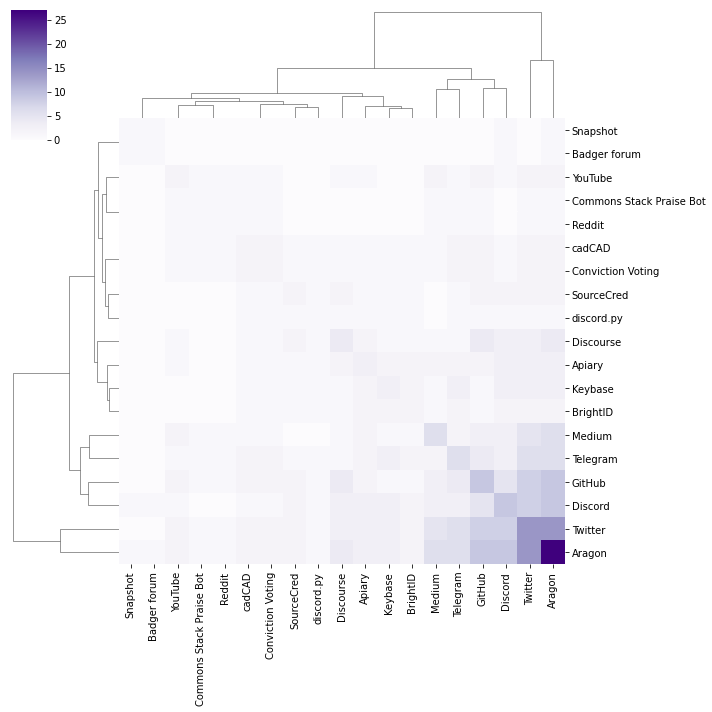

In [54]:
# %%

#normalized
#tool_data = np.matmul(data.T,data)/np.sum(data, axis=0)
#unnormalized
tool_data = np.matmul(data.T,data)


tool_data_df = pd.DataFrame(tool_data, index = getnames(co_use), columns=getnames(co_use) )
sns.clustermap(data=tool_data_df, cmap = 'Purples')

['recHncqDiLal7GAPm', 'recGa1fVGsK8j2wDT', 'recPAwMZyZGH97Xda', 'recijAqJh9rxY9MvH', 'rec8rCOyDwcwrT95S', 'recHguxXzLnxXte9V', 'reca46I0TM3JSABJx', 'rec2aM39btP3k6DRC', 'rectjqMULWohD6jFn', 'reca3rpaEVFR4icy7', 'recfOuKEZhI9vi3qO', 'recRJTkqk5uAagiMR', 'recYxW89TiCDVKazv', 'recxV84caJxiUcGVw', 'rec30pawOK8rt6ZjR', 'recNKpSgWTry1rc2m', 'recon8w3CwntZZe7a', 'rec1gZ3HltfC61ckE', 'recTLikaQcam7XT6J']
['recHncqDiLal7GAPm', 'recGa1fVGsK8j2wDT', 'recPAwMZyZGH97Xda', 'recijAqJh9rxY9MvH', 'rec8rCOyDwcwrT95S', 'recHguxXzLnxXte9V', 'reca46I0TM3JSABJx', 'rec2aM39btP3k6DRC', 'rectjqMULWohD6jFn', 'reca3rpaEVFR4icy7', 'recfOuKEZhI9vi3qO', 'recRJTkqk5uAagiMR', 'recYxW89TiCDVKazv', 'recxV84caJxiUcGVw', 'rec30pawOK8rt6ZjR', 'recNKpSgWTry1rc2m', 'recon8w3CwntZZe7a', 'rec1gZ3HltfC61ckE', 'recTLikaQcam7XT6J']


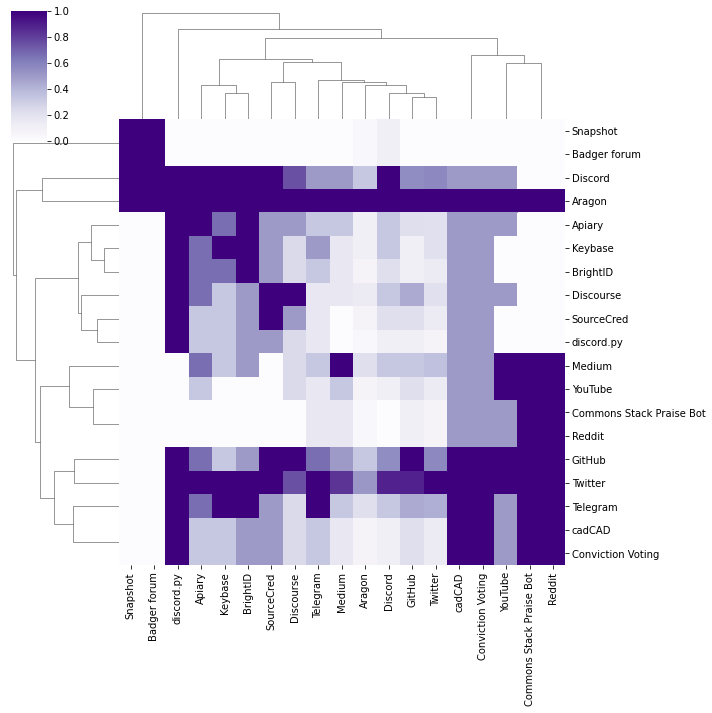

In [55]:
# %%

#normalized
tool_data = np.matmul(data.T,data)/np.sum(data, axis=0)
#unnormalized
#tool_data = np.matmul(data.T,data)


tool_data_df = pd.DataFrame(tool_data, index = getnames(co_use), columns=getnames(co_use) )
sns.clustermap(data=tool_data_df, cmap = 'Purples')

In [56]:
#cleanup incomplete records
data_df.drop('Apiary', axis=1, inplace=True)
data_df.drop('Medium', axis=1, inplace=True)

In [57]:
data_df.drop('Reddit', axis=1, inplace=True)

In [58]:
data_df.drop('YouTube', axis=1, inplace=True)

In [59]:
data_df.drop('Twitter', axis=1, inplace=True)

In [60]:
data_df.index

Index(['/r/ethtrader', '1Hive', 'Aragon Network DAO', 'BadgerDAO', 'BitFWD',
       'BlankDAO', 'BrightID', 'Collab19', 'Commons Stack Trusted Seed',
       'CRDAO', 'Curve DAO', 'DappNode', 'Decentraland',
       'Decentralized Pandemic Reserve', 'elimu.ai', 'EstoniaDAO', 'Galt',
       'LexDAO', 'Melon Protocol', 'MetaGame', 'NEDAO', 'OpenEsq', 'PieDAO',
       'Pocket Network DAO', 'SaintFame', 'Stake Capital', 'UniDAO'],
      dtype='object')

In [61]:
flipped = data_df.T

In [62]:
rdf = flipped[['1Hive', 'Aragon Network DAO',
       'BrightID', 'Commons Stack Trusted Seed', 'MetaGame']].T.copy()

In [63]:
rdf

,GitHub,SourceCred,Commons Stack Praise Bot,cadCAD,Keybase,Conviction Voting,discord.py,BrightID,Discord,Telegram,Snapshot,Discourse,Badger forum,Aragon
1Hive,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
Aragon Network DAO,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
BrightID,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
Commons Stack Trusted Seed,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
MetaGame,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [64]:
rdf.columns

Index(['GitHub', 'SourceCred', 'Commons Stack Praise Bot', 'cadCAD', 'Keybase',
       'Conviction Voting', 'discord.py', 'BrightID', 'Discord', 'Telegram',
       'Snapshot', 'Discourse', 'Badger forum', 'Aragon'],
      dtype='object')

In [65]:
record = {'cadCAD(org)': {'Conviction Voting':0, 'GitHub':1, 'Discourse':1, 'Telegram':0, 'cadCAD':1,
       'Aragon':1, 'Discord':1, 'Keybase':0, 'SourceCred':0, 'Slack':0, 'BrightID':0}}

In [66]:
rdf = rdf.append(pd.DataFrame(record).T)

/Users/zargham/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:7134: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(


In [67]:
rdf['Slack'] = 0.0

In [68]:
rdf

,Aragon,Badger forum,BrightID,Commons Stack Praise Bot,Conviction Voting,Discord,Discourse,GitHub,Keybase,Slack,Snapshot,SourceCred,Telegram,cadCAD,discord.py
1Hive,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Aragon Network DAO,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BrightID,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Commons Stack Trusted Seed,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
MetaGame,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
cadCAD(org),1.0,NaN,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,1.0,NaN


In [69]:
rdf['BrightID'] = [1.0,0.0, 1.0, 0.0, 0.0, 0.0]

In [70]:
rdf

,Aragon,Badger forum,BrightID,Commons Stack Praise Bot,Conviction Voting,Discord,Discourse,GitHub,Keybase,Slack,Snapshot,SourceCred,Telegram,cadCAD,discord.py
1Hive,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Aragon Network DAO,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BrightID,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Commons Stack Trusted Seed,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
MetaGame,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
cadCAD(org),1.0,NaN,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,1.0,NaN


In [71]:
record = {'SourceCred(org)': {'Conviction Voting':0, 'GitHub':1, 'Discourse':1, 'Telegram':0, 'cadCAD':0,
       'Aragon':0, 'Discord':1, 'Keybase':0, 'SourceCred':1, 'Slack':0, 'BrightID':0}}

In [72]:
rdf = rdf.append(pd.DataFrame(record).T)

In [73]:
rdf

,Aragon,Badger forum,BrightID,Commons Stack Praise Bot,Conviction Voting,Discord,Discourse,GitHub,Keybase,Slack,Snapshot,SourceCred,Telegram,cadCAD,discord.py
1Hive,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Aragon Network DAO,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BrightID,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Commons Stack Trusted Seed,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
MetaGame,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
cadCAD(org),1.0,NaN,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,1.0,NaN
SourceCred(org),0.0,NaN,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN


In [74]:
record = {'BlockScience': {'Conviction Voting':0, 'GitHub':1, 'Discourse':0, 'Telegram':0, 'cadCAD':1,
       'Aragon':0, 'Discord':0, 'Keybase':0, 'SourceCred':0, 'Slack':1, 'BrightID':0}}

rdf = rdf.append(pd.DataFrame(record).T)

In [75]:
rdf

,Aragon,Badger forum,BrightID,Commons Stack Praise Bot,Conviction Voting,Discord,Discourse,GitHub,Keybase,Slack,Snapshot,SourceCred,Telegram,cadCAD,discord.py
1Hive,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Aragon Network DAO,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BrightID,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Commons Stack Trusted Seed,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
MetaGame,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
cadCAD(org),1.0,NaN,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,1.0,NaN
SourceCred(org),0.0,NaN,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN
BlockScience,0.0,NaN,0.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0,1.0,NaN


In [76]:
rdf.GitHub=1.0

In [77]:
rdf = rdf.fillna(0)

In [78]:
rdf

,Aragon,Badger forum,BrightID,Commons Stack Praise Bot,Conviction Voting,Discord,Discourse,GitHub,Keybase,Slack,Snapshot,SourceCred,Telegram,cadCAD,discord.py
1Hive,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Aragon Network DAO,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BrightID,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Commons Stack Trusted Seed,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
MetaGame,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
cadCAD(org),1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
SourceCred(org),0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
BlockScience,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Text(32.99999999999999, 0.5, 'Organization')

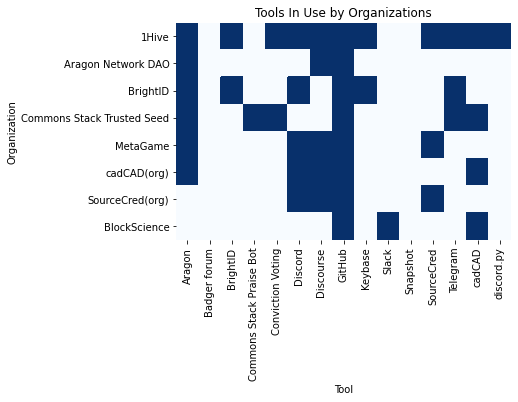

In [79]:
sns.heatmap(data=rdf, cmap = 'Blues', cbar=False)
plt.title('Tools In Use by Organizations')
plt.xlabel('Tool')
plt.ylabel('Organization')

In [80]:
rdf_data = rdf.values
rdf_cols = rdf.columns
rdf_ind = rdf.index

In [81]:
A = np.matmul(rdf_data.T, rdf_data)
D = np.diag(np.diag(A))

In [82]:
A

array([[6., 0., 2., 1., 2., 4., 4., 6., 2., 0., 0., 2., 3., 3., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 2., 0., 1., 2., 1., 2., 2., 0., 0., 1., 2., 1., 1.],
       [1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.],
       [2., 0., 1., 1., 2., 1., 1., 2., 1., 0., 0., 1., 2., 2., 1.],
       [4., 0., 2., 0., 1., 5., 4., 5., 2., 0., 0., 3., 2., 2., 1.],
       [4., 0., 1., 0., 1., 4., 5., 5., 1., 0., 0., 3., 1., 2., 1.],
       [6., 0., 2., 1., 2., 5., 5., 8., 2., 1., 0., 3., 3., 4., 1.],
       [2., 0., 2., 0., 1., 2., 1., 2., 2., 0., 0., 1., 2., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 1., 0., 1., 3., 3., 3., 1., 0., 0., 3., 1., 1., 1.],
       [3., 0., 2., 1., 2., 2., 1., 3., 2., 0., 0., 1., 3., 2., 1.],
       [3., 0., 1., 1., 2., 2., 2., 4., 1., 1., 0., 1., 2., 4., 1.],
       [1., 0., 1., 0., 1., 1., 1.

In [83]:
D

array([[6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 8., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [85]:
L = np.matmul(np.linalg.pinv(D),A)

In [ ]:
L

array([[1.        , 1.        , 1.        , 1.        , 0.        ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.        ],
       [0.25      , 1.        , 0.75      , 0.5       , 0.5       ,
        0.375     , 0.25      , 0.25      , 0.625     , 0.25      ,
        0.125     ],
       [0.33333333, 1.        , 1.        , 0.5       , 0.5       ,
        0.33333333, 0.33333333, 0.33333333, 0.66666667, 0.33333333,
        0.        ],
       [0.5       , 1.        , 0.75      , 1.        , 0.25      ,
        0.25      , 0.25      , 0.25      , 0.5       , 0.25      ,
        0.25      ],
       [0.        , 1.        , 0.75      , 0.25      , 1.        ,
        0.5       , 0.        , 0.        , 0.75      , 0.        ,
        0.        ],
       [0.33333333, 1.        , 0.66666667, 0.33333333, 0.66666667,
        1.        , 0.        , 0.33333333, 1.        , 0.33333333,
        0.        ],
       [0.5       , 1.        , 1.        , 0.5       , 0.

In [86]:
rdf_normed = pd.DataFrame(L, columns=rdf_cols, index=rdf_cols)

Text(0.5, 1.0, 'Rates of Mutual Use for Tools')

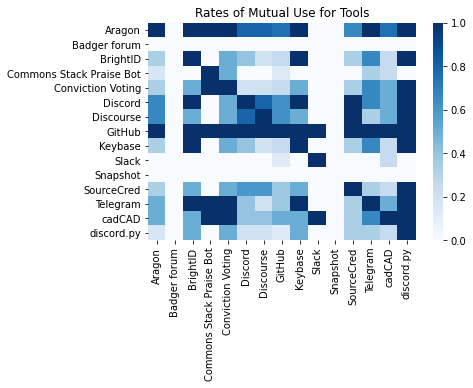

In [87]:
sns.heatmap(data=rdf_normed.T, cmap = 'Blues', )
plt.title('Rates of Mutual Use for Tools')

In [ ]:
#